## Data

### Feature Description

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

#### Understand the data
Here I load and view the dataset so that I can get a sense of the data structure,types and summary statistics.

In [2]:
#for default view
pd.set_option("display.max_columns",50)

#load dataset,specify encoding and let pandas handle the dtypes
data=pd.read_csv('AviationData.csv',encoding='ISO-8859-1',low_memory=False)

#view the first few rows of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#view the last few rows of the dataset
data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
#create the copy to be used in cleaning
data1=data.copy(deep=True)

#view the new dataset
data1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#check the dataset information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
#summary statistics for numerical columns
sum_stats=data1.describe()
sum_stats

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
#statistics for categorical columns
cat_stat=data1[[ 'Investigation.Type','Location', 'Country','Airport.Name', 'Injury.Severity', 'Aircraft.damage','Aircraft.Category','Make', 'Model','Amateur.Built', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status']].describe(include='O').T
cat_stat

,count,unique,top,freq
Investigation.Type,88889,2,Accident,85015
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Airport.Name,52704,24870,Private,240
Injury.Severity,87889,109,Non-Fatal,67357
Aircraft.damage,85695,4,Substantial,64148
Aircraft.Category,32287,15,Airplane,27617
Make,88826,8237,Cessna,22227
Model,88797,12318,152,2367
Amateur.Built,88787,2,No,80312


#### Manipulate the column 
I need to ensure the column names are uniform, easily understood and remove columns i deem unnecessary,


In [8]:
#check the columns
data1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#replacing the . with a _ and changing to lowercase
data1.columns=data1.columns.str.replace('.','_').str.lower()
data1.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [10]:
#removing unnecessary columns that aren't needed in my analysis 
data1.drop(columns=['accident_number','latitude','longitude','airport_code','airport_name','far_description','broad_phase_of_flight','number_of_engines','engine_type','registration_number','publication_date'],inplace=True)
data1.columns

Index(['event_id', 'investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'aircraft_category', 'make',
       'model', 'amateur_built', 'schedule', 'purpose_of_flight',
       'air_carrier', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'report_status'],
      dtype='object')

#### correct the datatypes
I check the data datatypes in my data to see if they are appropriate for each column,then I convert the unappropriate ones to the correct type. 

In [11]:
#check the datatypes for data1 
data1.dtypes

event_id                   object
investigation_type         object
event_date                 object
location                   object
country                    object
injury_severity            object
aircraft_damage            object
aircraft_category          object
make                       object
model                      object
amateur_built              object
schedule                   object
purpose_of_flight          object
air_carrier                object
total_fatal_injuries      float64
total_serious_injuries    float64
total_minor_injuries      float64
total_uninjured           float64
weather_condition          object
report_status              object
dtype: object

In [12]:
# Convert the 'event_date' column to datetime
data1['event_date'] = pd.to_datetime(data1['event_date'])
data1.dtypes

event_id                          object
investigation_type                object
event_date                datetime64[ns]
location                          object
country                           object
injury_severity                   object
aircraft_damage                   object
aircraft_category                 object
make                              object
model                             object
amateur_built                     object
schedule                          object
purpose_of_flight                 object
air_carrier                       object
total_fatal_injuries             float64
total_serious_injuries           float64
total_minor_injuries             float64
total_uninjured                  float64
weather_condition                 object
report_status                     object
dtype: object

#### Handling missing values
Here I check for missing values in the dataset and strategize what to do 
In this case i decided to drop columns that were missing alot of values,impute 'unknown' on columns that are missing categorical data and for numerical data that is missing we will interpolate using the existing values

In [13]:
#create a function called miss_per that finds missing values and their percentage
def miss_per(x):
    # Create an empty dictionary to hold column names and their missing values
    d = {}

    # Count of missing values for each column
    for column in x.columns:
        d[column] = x[column].isna().sum()

    # Create a DataFrame from the dictionary
    missing = pd.DataFrame(list(d.items()), columns=['Column', 'missing_values'])

    # Calculate the percentage of missing values to 2 decimal places
    missing["missing_percentage"] = round((missing["missing_values"] / len(x)) * 100, 2)

    # Sort the missing_percentage column in ascending order
    missing = missing.sort_values(by='missing_percentage', ascending=True).reset_index(drop=True)

    return missing

#find missing values and their percentage in data1
missing_values=miss_per(data1)
missing_values

,Column,missing_values,missing_percentage
0,event_id,0,0.00
1,investigation_type,0,0.00
2,event_date,0,0.00
3,location,52,0.06
4,make,63,0.07
5,model,92,0.10
6,amateur_built,102,0.11
7,country,226,0.25
8,injury_severity,1000,1.12
9,aircraft_damage,3194,3.59


In [14]:
# Drop columns with a missing_percentage greater than 80
columns_to_drop = missing_values[missing_values["missing_percentage"] > 80]["Column"].tolist()
data1= data1.drop(columns=columns_to_drop)

#check missing values
missing_values1=miss_per(data1)
missing_values1

,Column,missing_values,missing_percentage
0,event_id,0,0.00
1,investigation_type,0,0.00
2,event_date,0,0.00
3,location,52,0.06
4,make,63,0.07
5,model,92,0.10
6,amateur_built,102,0.11
7,country,226,0.25
8,injury_severity,1000,1.12
9,aircraft_damage,3194,3.59


In [15]:
#create a list of the columns you want to fill with unkown
l2=['location','country','injury_severity','model','make','amateur_built','weather_condition','purpose_of_flight','report_status','aircraft_category']

#fill missing values in the specified columns with 'unknown'
for i in l2:
        data1.fillna({i:'unknown'},inplace=True)
        
#find missing values and their percentage in data1
missing_values=miss_per(data1)
missing_values

,Column,missing_values,missing_percentage
0,event_id,0,0.00
1,purpose_of_flight,0,0.00
2,amateur_built,0,0.00
3,model,0,0.00
4,weather_condition,0,0.00
5,aircraft_category,0,0.00
6,make,0,0.00
7,injury_severity,0,0.00
8,country,0,0.00
9,location,0,0.00


In [16]:
# Use str.replace to remove characters after 'Fatal' for rows that contain 'Fatal'
data1['injury_severity'] = data1['injury_severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

# Use str.replace to replace Unavailable with unknown
data1['injury_severity'] = data1['injury_severity'].str.replace('Unavailable', 'unknown', regex=True)

#Use str.replace to replace nan values with Unknown
data1['aircraft_damage']= data1['aircraft_damage'].fillna('Unknown')

In [17]:
#find missing values and their percentage in data1
missing_values=miss_per(data1)
missing_values

,Column,missing_values,missing_percentage
0,event_id,0,0.00
1,purpose_of_flight,0,0.00
2,amateur_built,0,0.00
3,model,0,0.00
4,weather_condition,0,0.00
5,aircraft_category,0,0.00
6,make,0,0.00
7,injury_severity,0,0.00
8,country,0,0.00
9,location,0,0.00


In [18]:
# Interpolate missing values in 'total_uninjured'
data1['total_uninjured']=data1['total_uninjured'].interpolate(method='linear')

# Convert the interpolated values to integers
data1['total_uninjured'] = data1['total_uninjured'].astype(int)

In [19]:
# Interpolate missing values in 'total_fatal_injuries'
data1['total_fatal_injuries']=data1['total_fatal_injuries'].interpolate(method='linear')

# Convert the interpolated values to integers
data1['total_fatal_injuries'] = data1['total_fatal_injuries'].astype(int)

In [20]:
# Interpolate missing values in 'total_minor_injuries'
data1['total_minor_injuries']=data1['total_minor_injuries'].interpolate(method='linear')

# Convert the interpolated values to integers
data1['total_minor_injuries'] = data1['total_minor_injuries'].astype(int)

In [21]:
# Interpolate missing values in 'total_serious_injuries'
data1['total_serious_injuries']=data1['total_serious_injuries'].interpolate(method='linear')

# Convert the interpolated values to integers
data1['total_serious_injuries'] = data1['total_serious_injuries'].astype(int)

In [22]:
#find missing values and their percentage in data1
missing_values=miss_per(data1)
missing_values

,Column,missing_values,missing_percentage
0,event_id,0,0.0
1,total_uninjured,0,0.0
2,total_minor_injuries,0,0.0
3,total_serious_injuries,0,0.0
4,total_fatal_injuries,0,0.0
5,purpose_of_flight,0,0.0
6,amateur_built,0,0.0
7,model,0,0.0
8,make,0,0.0
9,aircraft_category,0,0.0


#### removing duplicates
I identify the duplicates then remove them as they are of no use to me.

In [23]:
#checking for duplicates
data1.duplicated().sum()

36

In [24]:
#removing duplicates
data1=data1.drop_duplicates()
#check duplicates
data1.duplicated().sum().any()

False

#### standardizing data
This means that I ensure that categorical values are consistent format

In [25]:
#looping theough all columns to get unique values
for column in data1.columns:
    unique_values=data1[column].unique()
    print(f"Unique values in column '{column}':{unique_values}")

Unique values in column 'event_id':['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']
Unique values in column 'investigation_type':['Accident' 'Incident']
Unique values in column 'event_date':<DatetimeArray>
['1948-10-24 00:00:00', '1962-07-19 00:00:00', '1974-08-30 00:00:00',
 '1977-06-19 00:00:00', '1979-08-02 00:00:00', '1979-09-17 00:00:00',
 '1981-08-01 00:00:00', '1982-01-01 00:00:00', '1982-01-02 00:00:00',
 '1982-01-03 00:00:00',
 ...
 '2022-12-13 00:00:00', '2022-12-14 00:00:00', '2022-12-15 00:00:00',
 '2022-12-16 00:00:00', '2022-12-17 00:00:00', '2022-12-18 00:00:00',
 '2022-12-21 00:00:00', '2022-12-22 00:00:00', '2022-12-26 00:00:00',
 '2022-12-29 00:00:00']
Length: 14782, dtype: datetime64[ns]
Unique values in column 'location':['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']
Unique values in column 'country':['United States' 'unknown' 'GULF OF MEXICO' 'Pu

In [26]:
#converting all categorical columns to lowercase
cat_cols=data1.select_dtypes(include=['object','category']).columns

data1[cat_cols]=data1[cat_cols].apply(lambda x:x.str.lower())

data1.head()

,event_id,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status
0,20001218x45444,accident,1948-10-24,"moose creek, id",united states,fatal,destroyed,unknown,stinson,108-3,no,personal,2,0,0,0,unk,probable cause
1,20001218x45447,accident,1962-07-19,"bridgeport, ca",united states,fatal,destroyed,unknown,piper,pa24-180,no,personal,4,0,0,0,unk,probable cause
2,20061025x01555,accident,1974-08-30,"saltville, va",united states,fatal,destroyed,unknown,cessna,172m,no,personal,3,0,0,0,imc,probable cause
3,20001218x45448,accident,1977-06-19,"eureka, ca",united states,fatal,destroyed,unknown,rockwell,112,no,personal,2,0,0,0,imc,probable cause
4,20041105x01764,accident,1979-08-02,"canton, oh",united states,fatal,destroyed,unknown,cessna,501,no,personal,1,2,0,0,vmc,probable cause


#### data distributions
I check how my data is distributed using histograms.
This helps when i want to choose a method to deal with outliers and such.

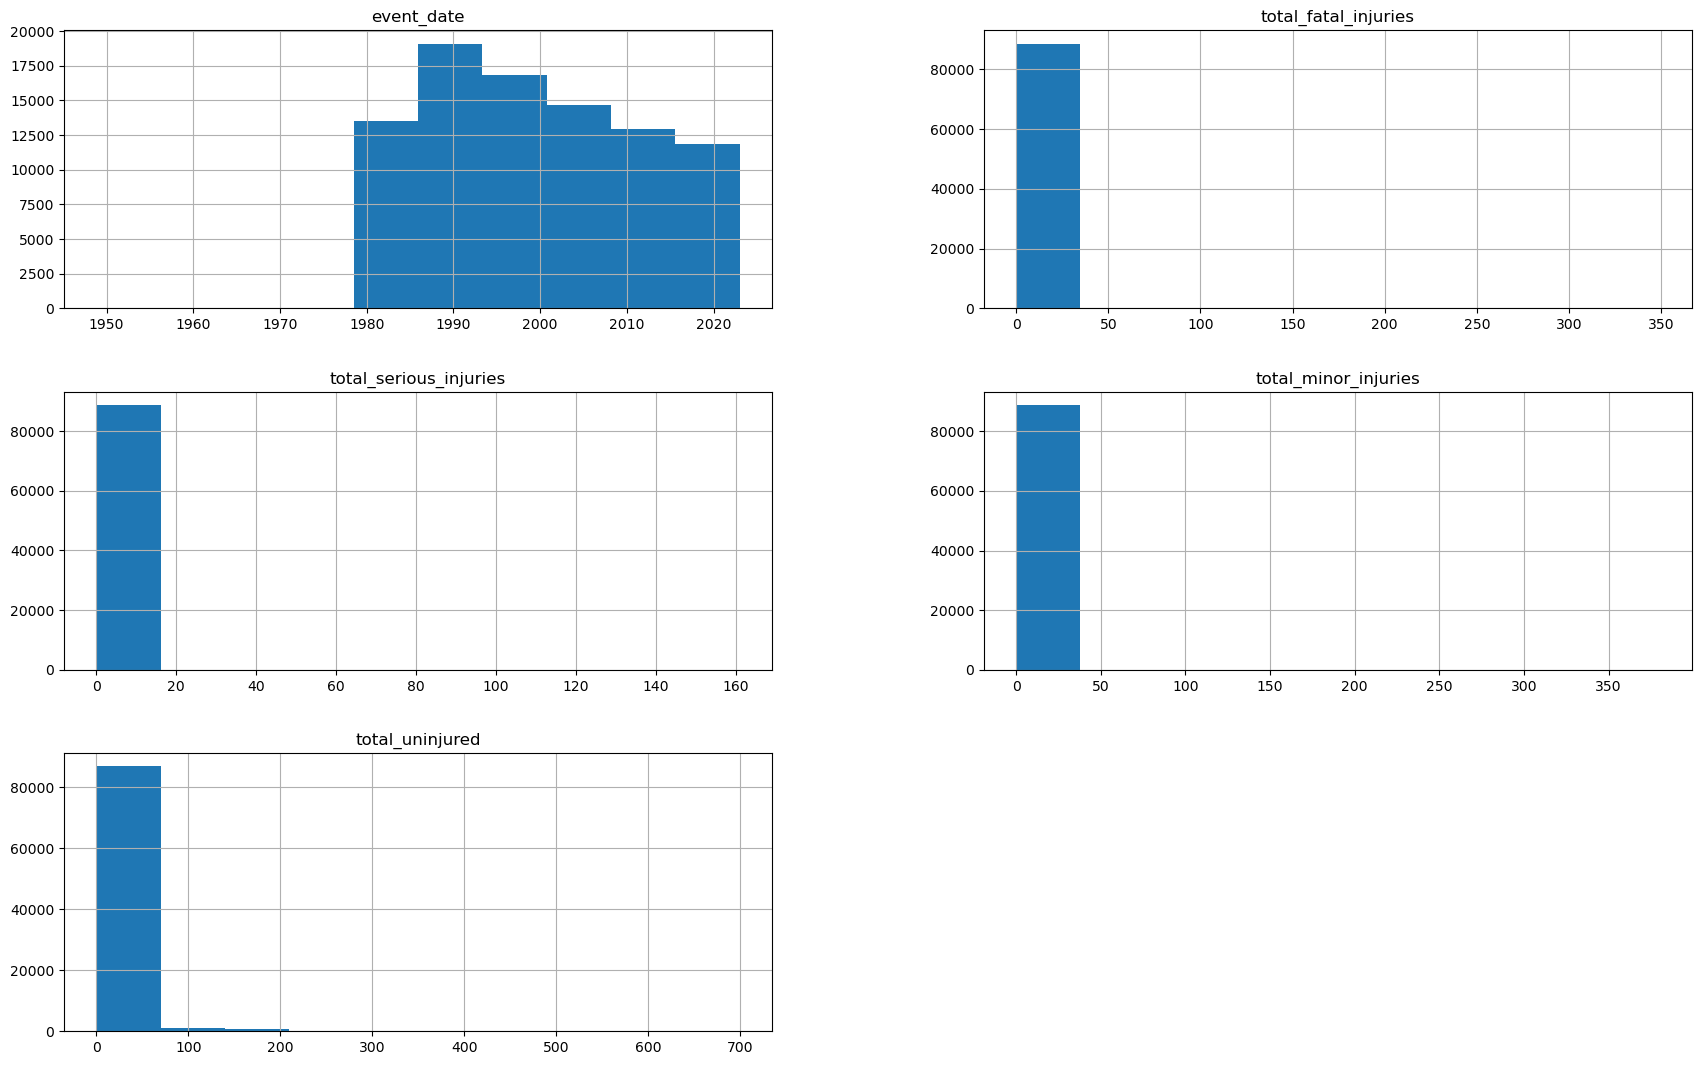

In [27]:
data1.hist(bins=10, figsize=(21,13));


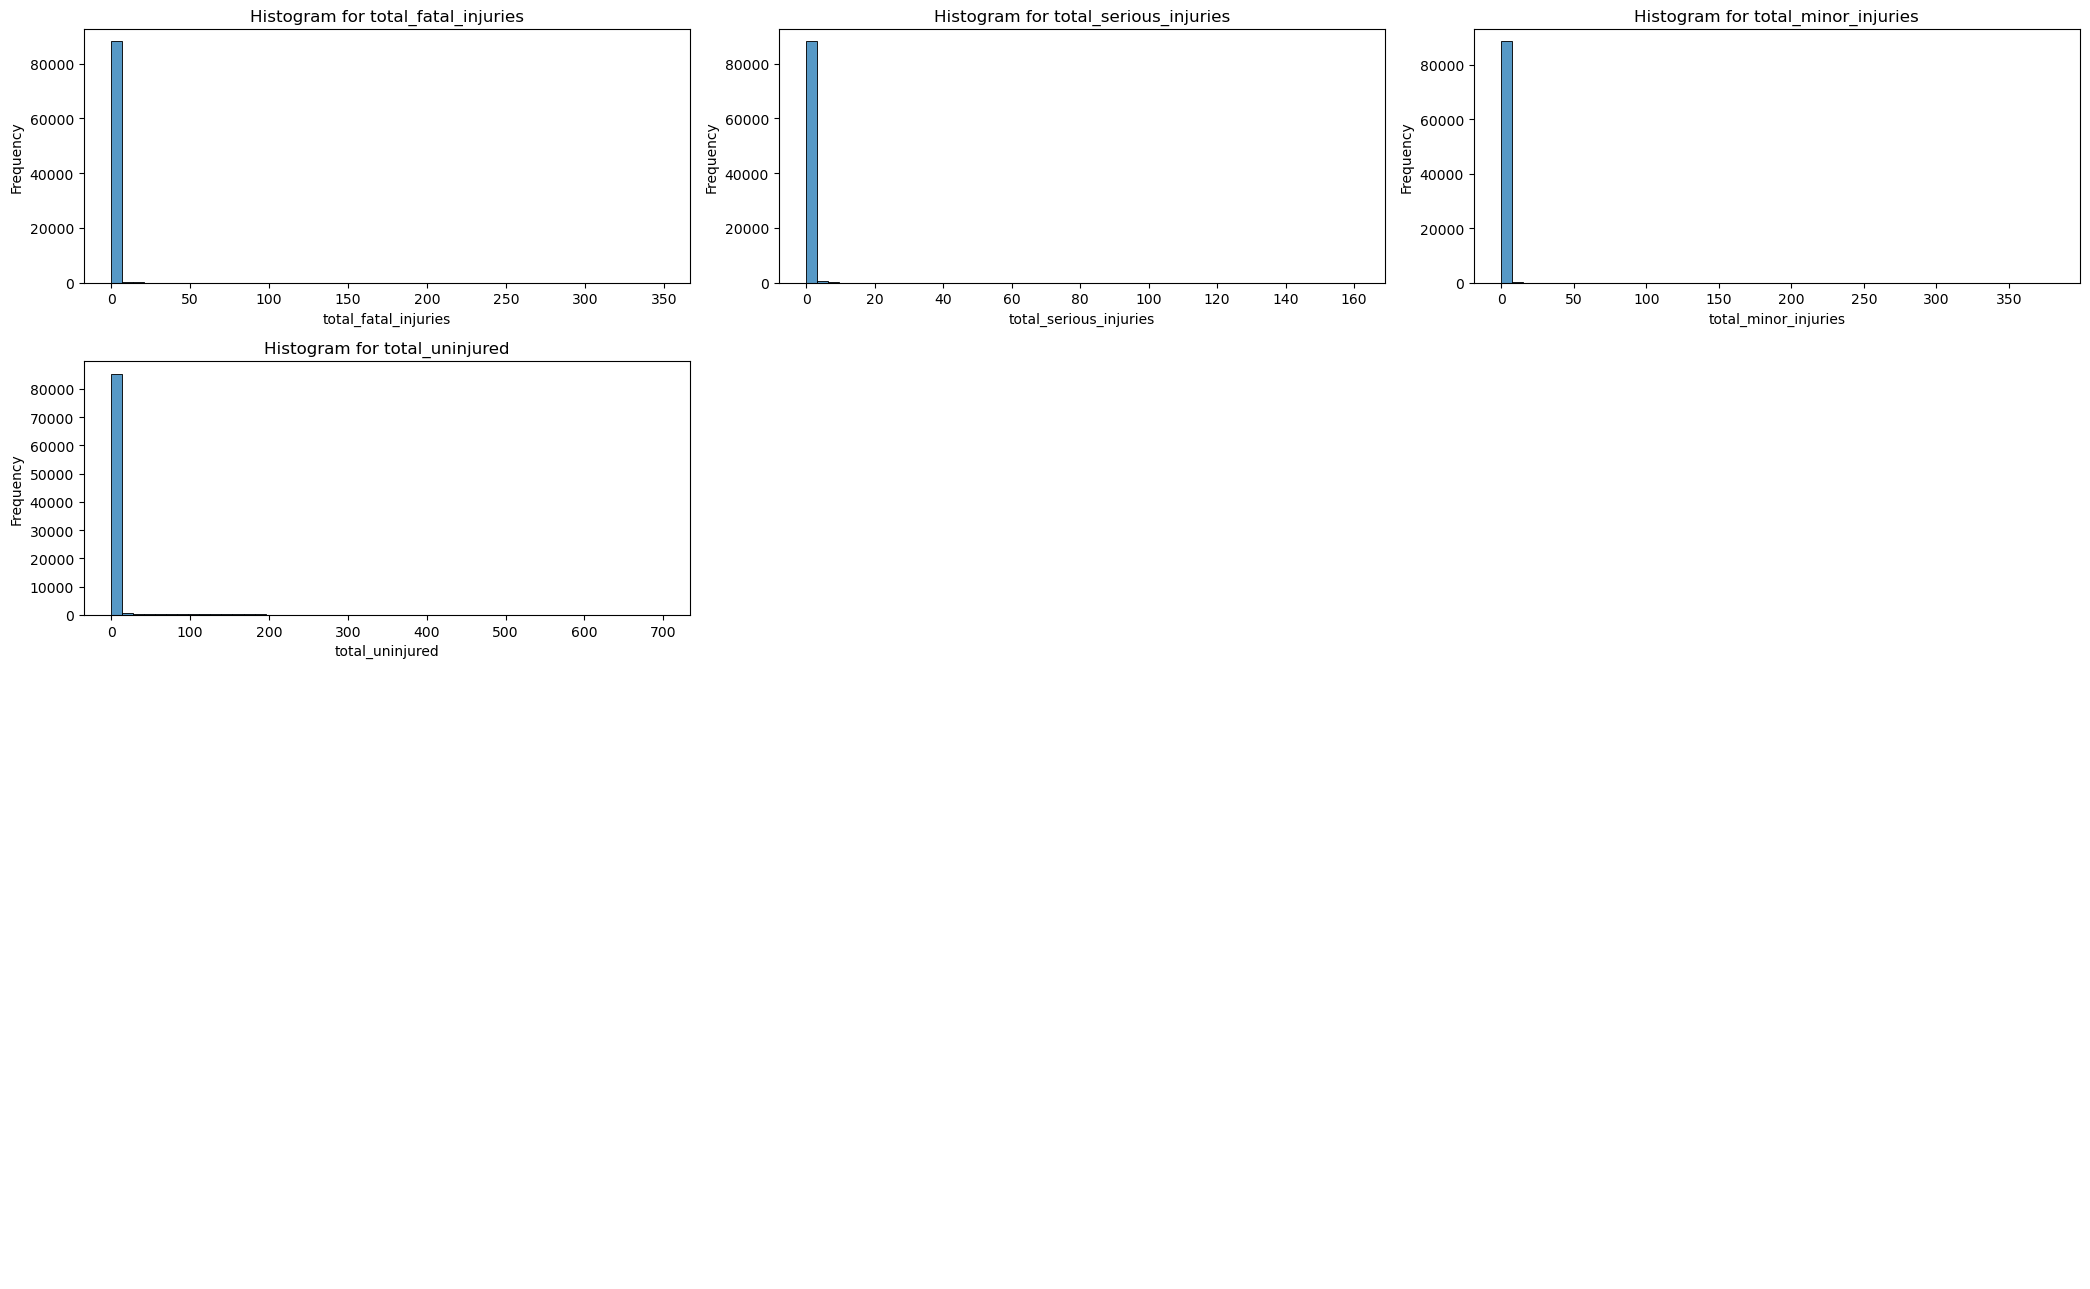

In [28]:
# Only select numeric columns 
numeric_columns = data1.select_dtypes(include=['number']).columns[:]

# Define grd layout 
rows, cols = 4,3
fig, axes = plt.subplots(rows, cols, figsize=(21,13))

# Flatten the arrays 
axes = axes.flatten()

# Plot histograms for numeric columns 
for i, column in enumerate(numeric_columns):
    sns.histplot(data1[column], bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
    
#Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout();

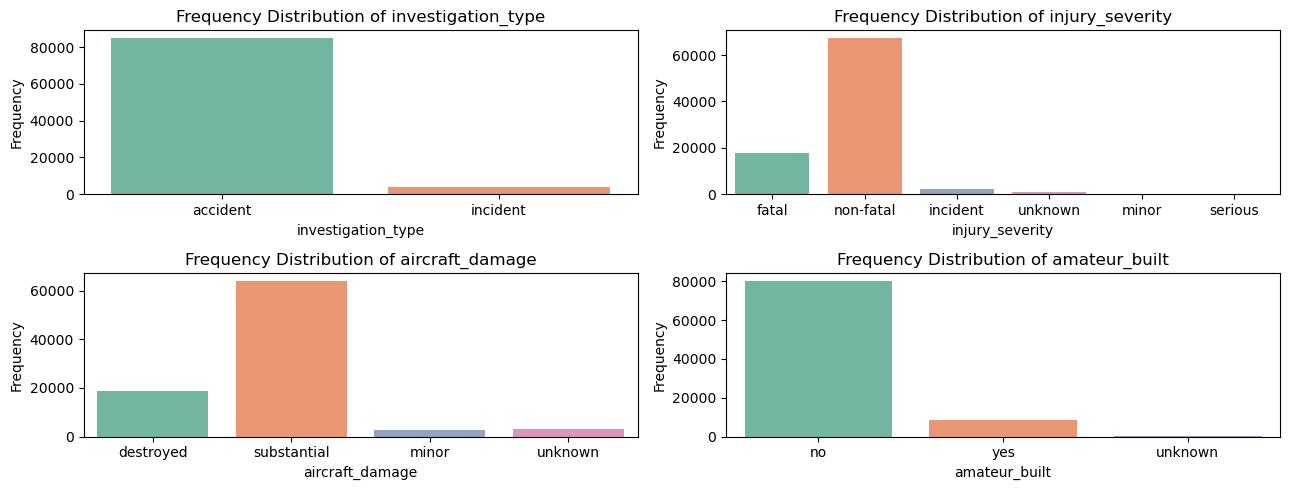

In [29]:
# Specify the categorical columns you want to plot
selected_col=['investigation_type','injury_severity','aircraft_damage','amateur_built',]

# Define grid layout for the subplots
rows, cols = 2, 2  # Adjusted grid layout since you have 2 columns to plot
fig, axes = plt.subplots(rows, cols, figsize=(13, 5))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and plot using Seaborn's countplot
for i, column in enumerate(selected_col):
    # Use Seaborn's countplot for categorical data
    sns.countplot(data=data1, x=column, ax=axes[i], palette='Set2', hue=column)
    
    # Set plot title and labels
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    # Rotate x labels for readability
    axes[i].tick_params(axis='x', rotation=0) 

    
# Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout();

#### handle outliers
An outlier is a data point that differs significantly from other observations in a dataset. 
It can be much higher or lower than the other values and can indicate variability in the data, measurement errors, or a phenomenon that warrants further investigation.
I used statistical methods and visualization to identify outliers and choose to remove outliers.

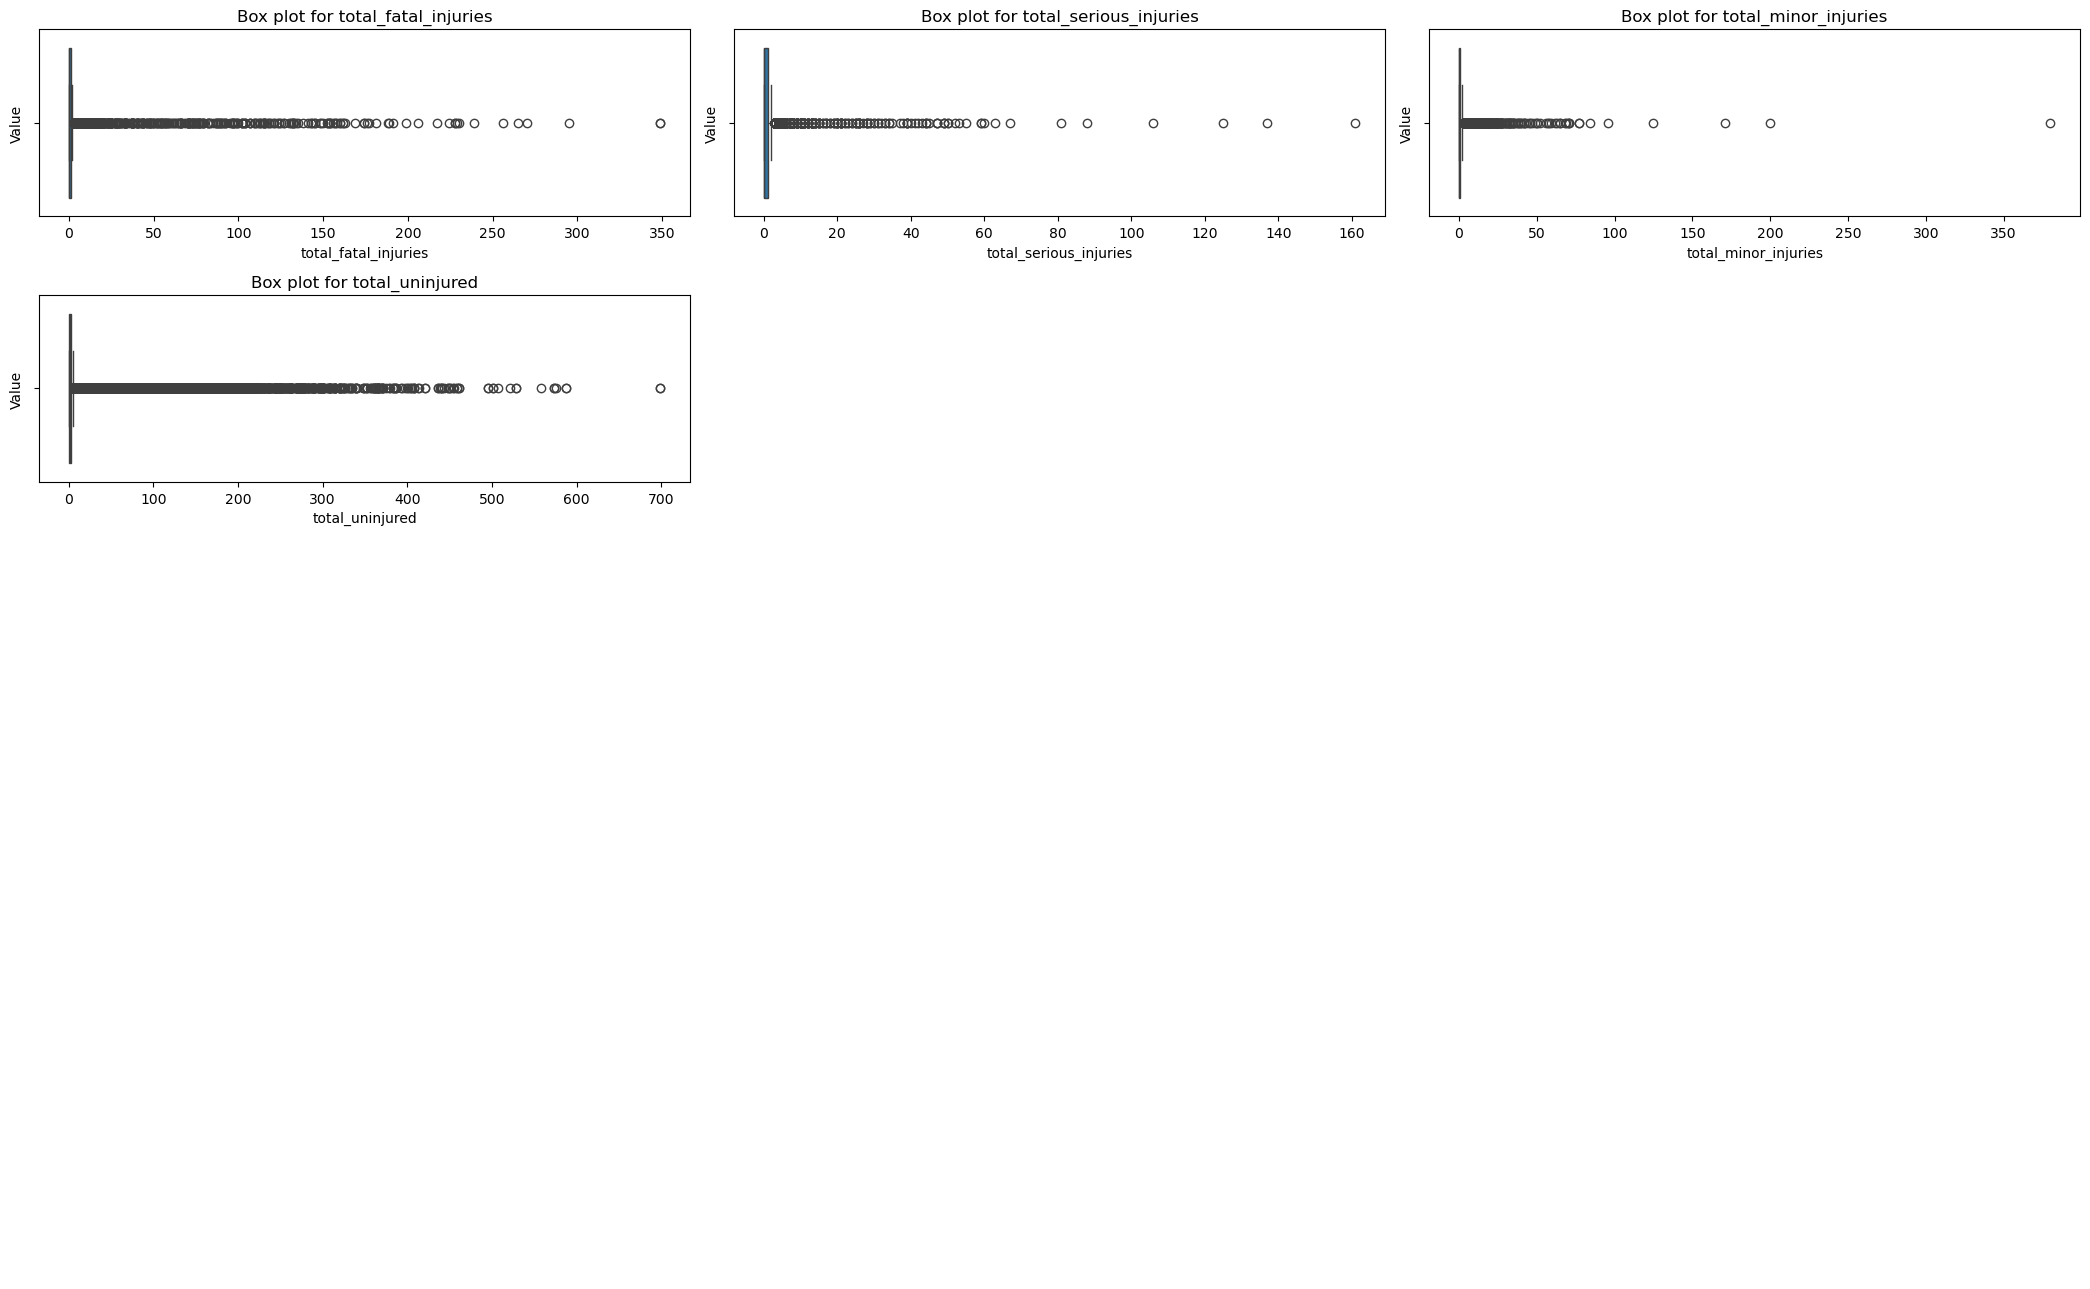

In [30]:
# Grid layout

#Number of rows and columns for the grid layout of subplots
rows, cols = 5, 3

#Create a figure and a grid of subplots with the specified number of rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))

# Flatten for easier indexing 
axes = axes.flatten()

# Loop through each numeric column to create box plots
for i, column in enumerate(numeric_columns):
    # Create a box plot for the current column and assign it to the corresponding subplot
    sns.boxplot(x=data1[column], ax = axes[i])
    # Set the title for the current subplot to indicate which column it represents
    axes[i].set_title(f"Box plot for {column}")
    #Set the x-axis label to the name of the current column
    axes[i].set_xlabel(column)
    # Set the y-axis label to 'Value' to indicate what the box plot represents
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    # Turn off the axis for unused subplots
    axes[j].axis('off')

# Adjust the layout to prevent overlap of titles and labels and show the plot    
plt.tight_layout();


In [31]:
# removing outliers

# Create a copy of the data
data_copy = data1.copy()

# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.10)  # .10
q3 = numeric_data.quantile(0.90)  # .95
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

data1 = data_copy.copy()

Number of rows before removing outliers: 88853
Number of rows after removing outliers: 80626
Number of rows removed: 8227


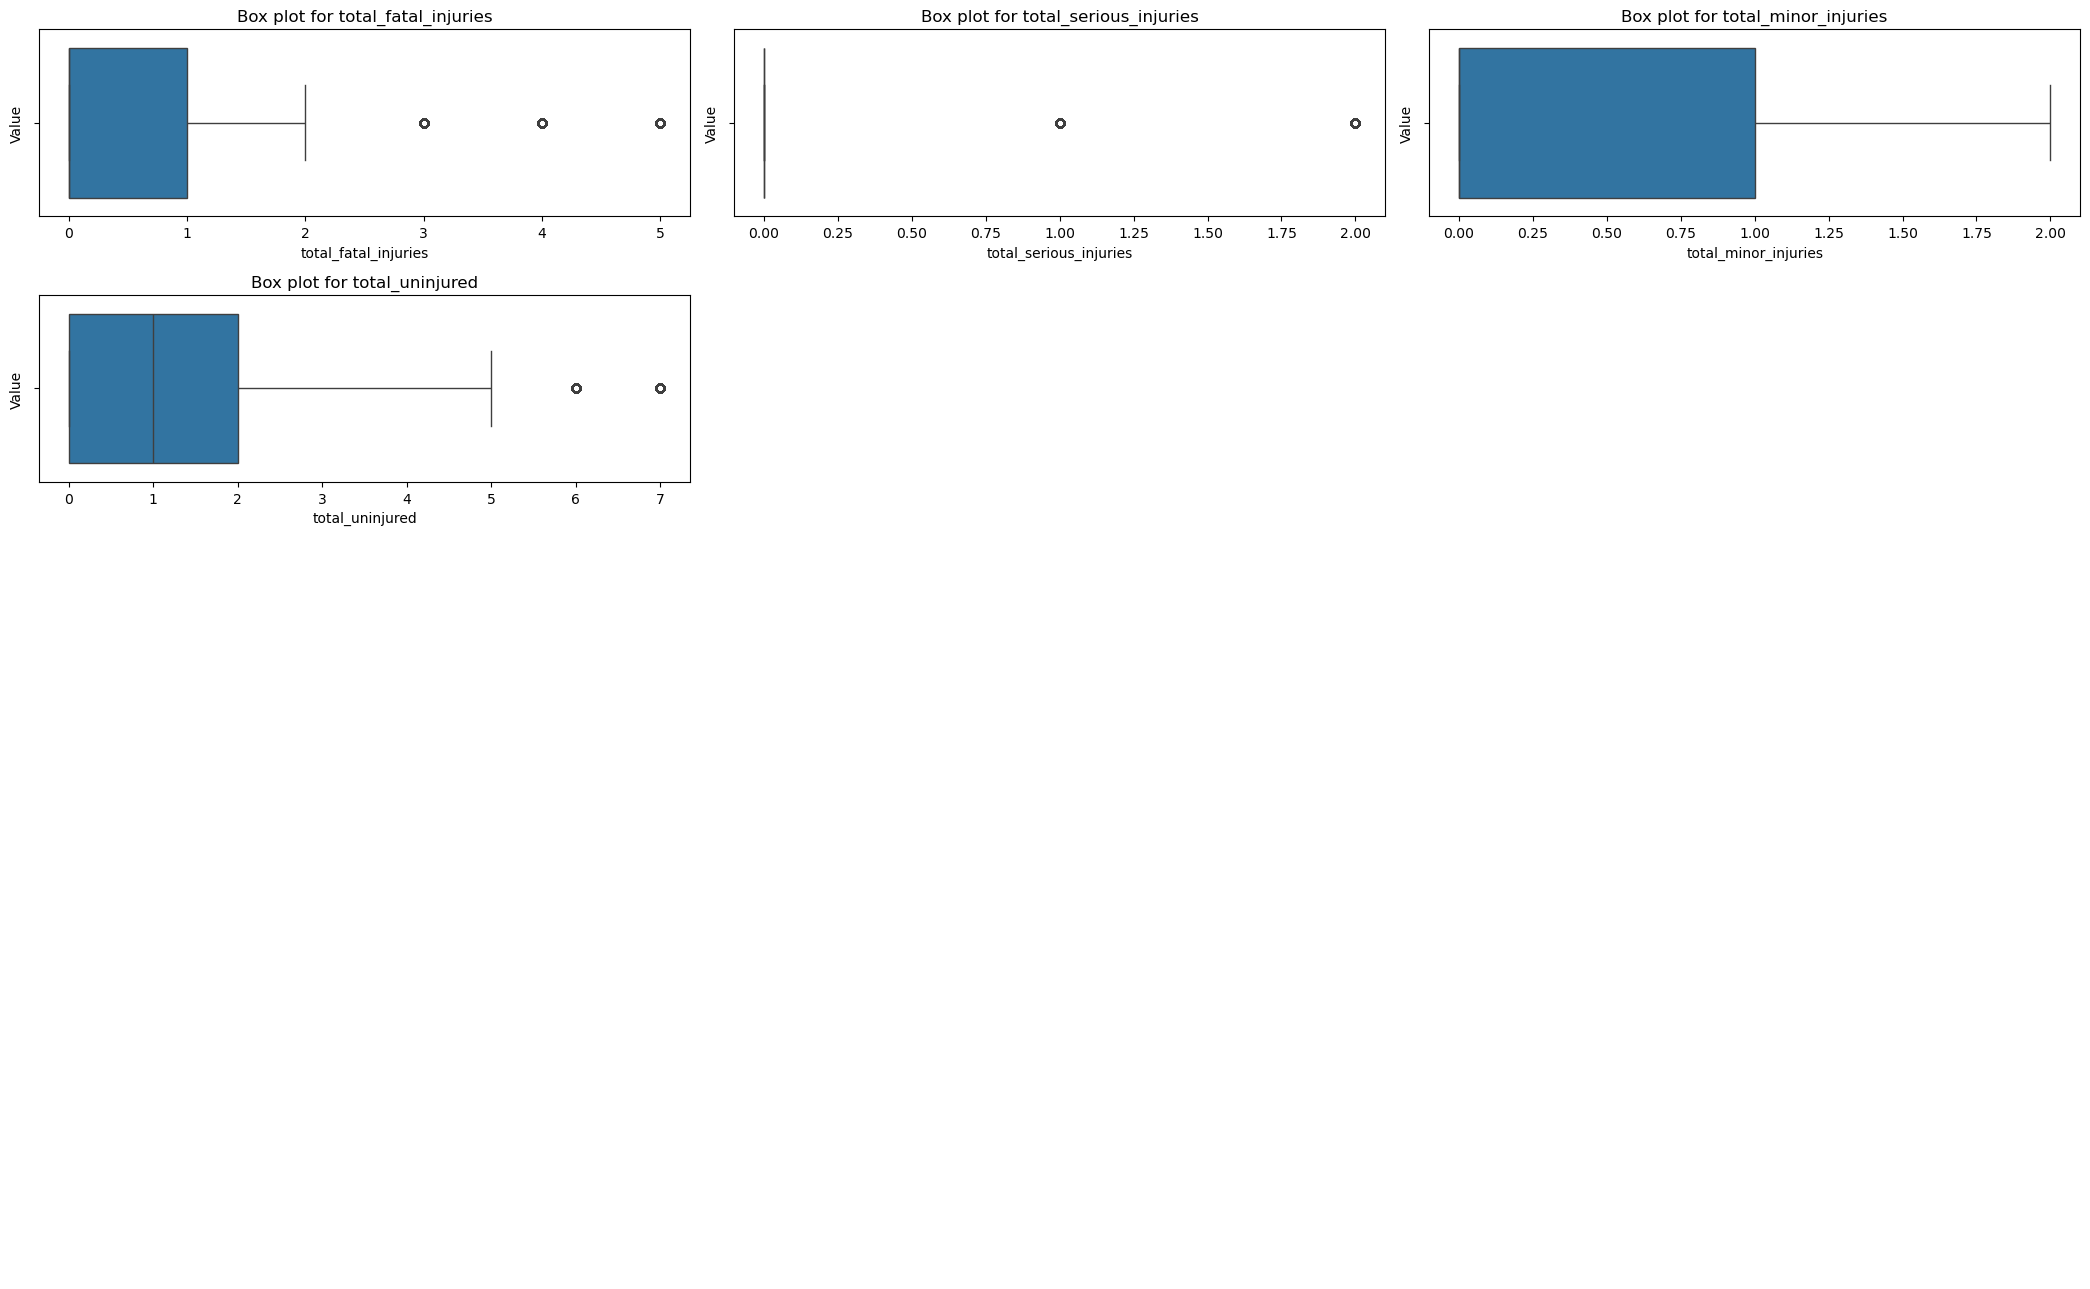

In [32]:
# Grid layout

#Number of rows and columns for the grid layout of subplots
rows, cols = 5, 3

#Create a figure and a grid of subplots with the specified number of rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))

# Flatten for easier indexing 
axes = axes.flatten()

# Loop through each numeric column to create box plots
for i, column in enumerate(numeric_columns):
    # Create a box plot for the current column and assign it to the corresponding subplot
    sns.boxplot(x=data1[column], ax = axes[i])
    # Set the title for the current subplot to indicate which column it represents
    axes[i].set_title(f"Box plot for {column}")
    #Set the x-axis label to the name of the current column
    axes[i].set_xlabel(column)
    # Set the y-axis label to 'Value' to indicate what the box plot represents
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    # Turn off the axis for unused subplots
    axes[j].axis('off')

# Adjust the layout to prevent overlap of titles and labels and show the plot    
plt.tight_layout();



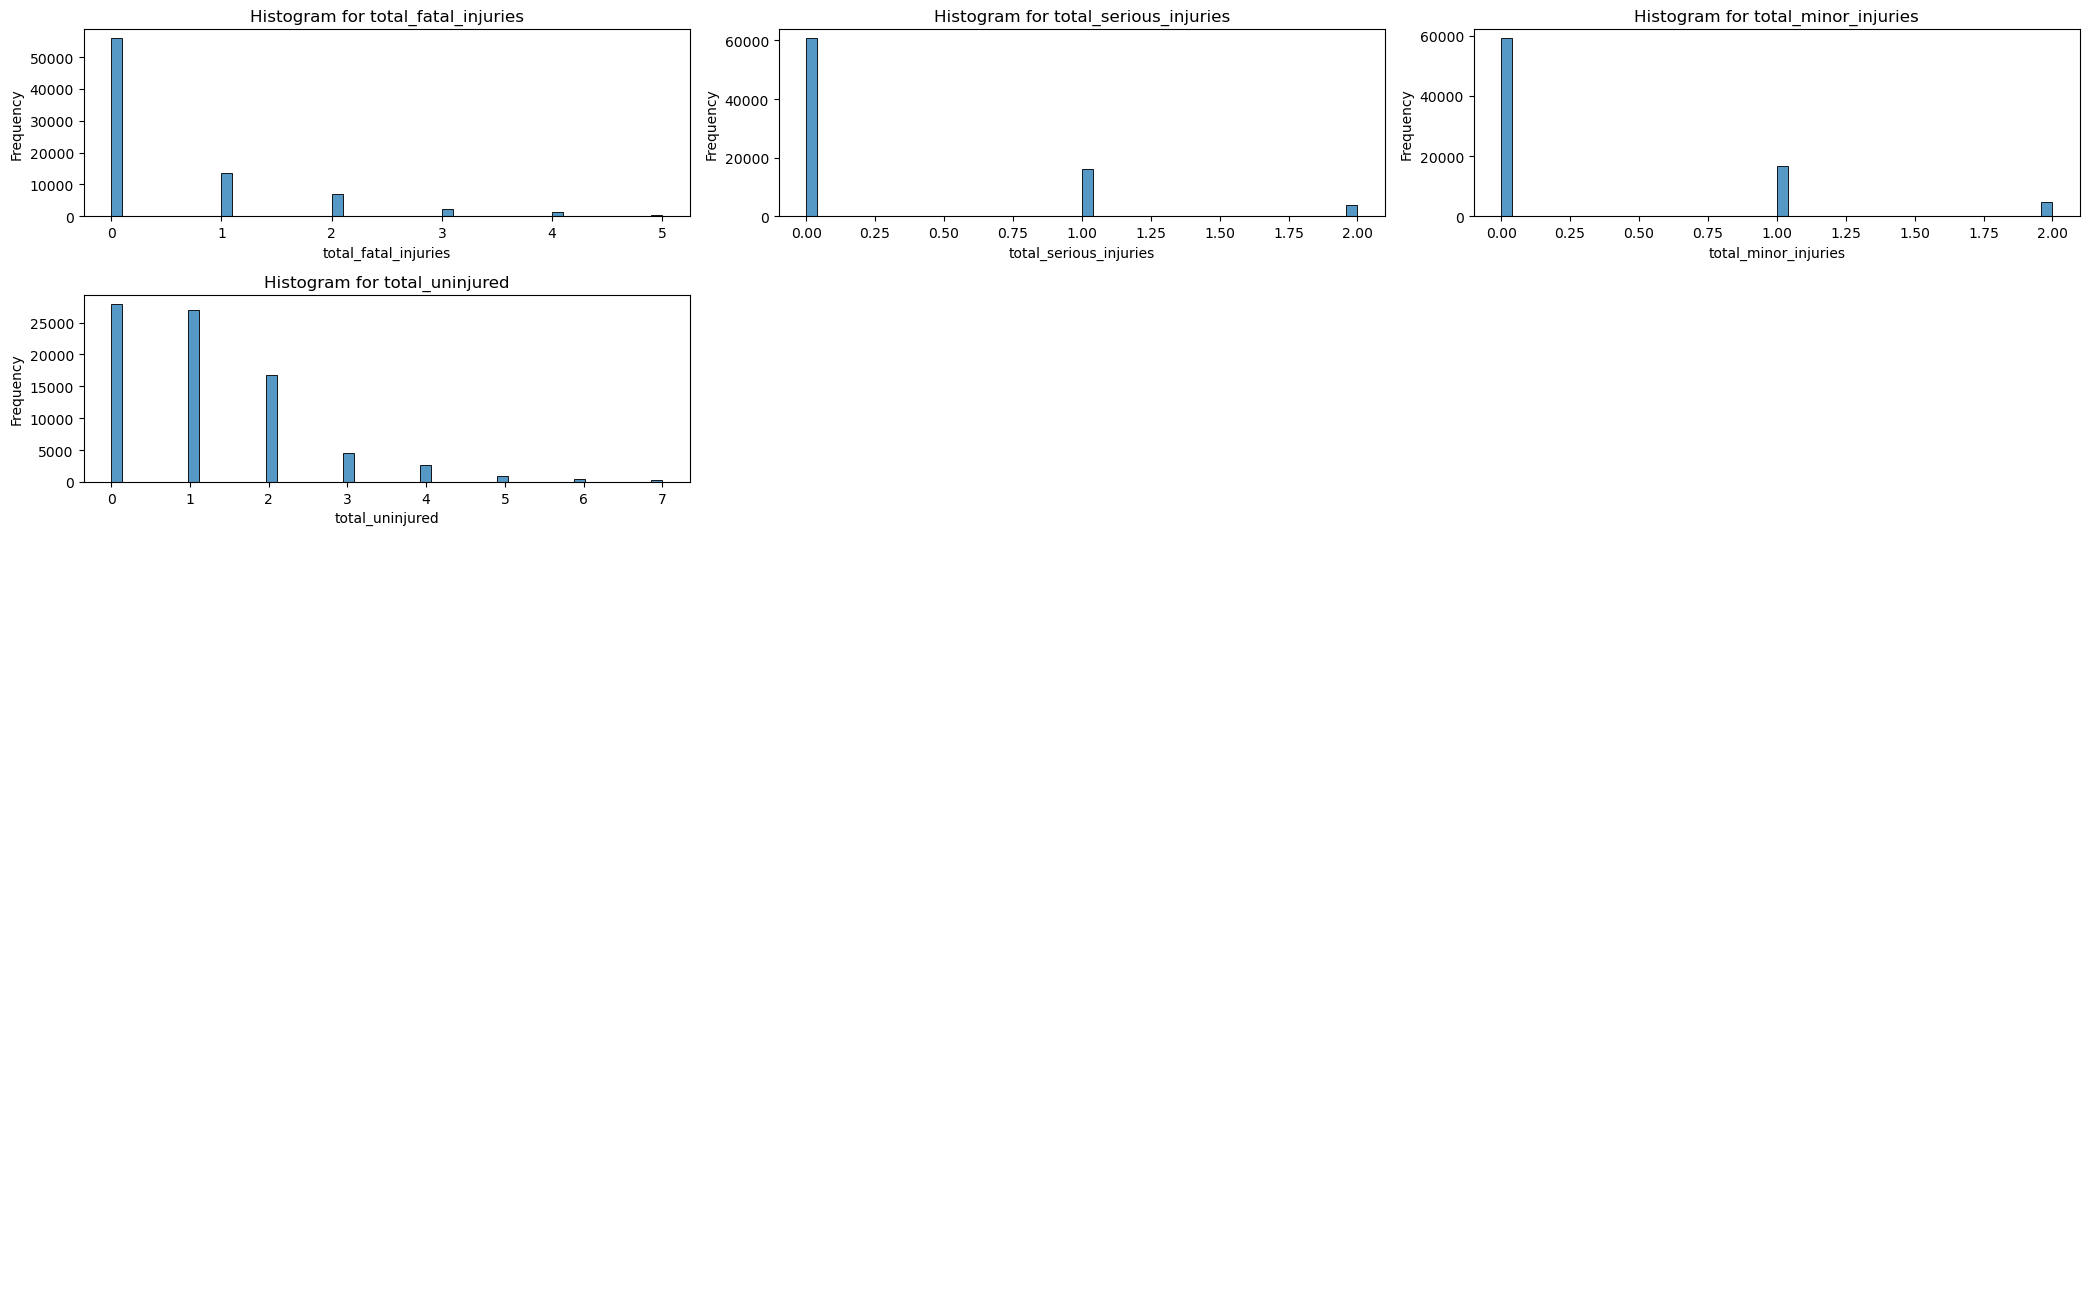

In [33]:
# Only select numeric columns 
numeric_columns = data1.select_dtypes(include=['number']).columns[:]

# Define grd layout 
rows, cols = 5,3
fig, axes = plt.subplots(rows, cols, figsize=(21,13))

# Flatten the arrays 
axes = axes.flatten()

# Plot histograms for numeric columns 
for i, column in enumerate(numeric_columns):
    sns.histplot(data1[column], bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
    
# Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

#Adjust the layout to prevent overlap of titles and labels and show the plot    
plt.tight_layout();

#### feature engineering
This creating new columns in a dataset by using the other columns or just new columns 
Here i create new columns called: totalinjury,year etc

In [34]:
#create fatalities
data1['total_injuries']=data1['total_fatal_injuries']+data1['total_minor_injuries']+data1['total_serious_injuries']

#moving the column
column_to_move='total_injuries'
new_position=15

# Create a new column order
columns = data1.columns.tolist()  # Get the original column order
columns.remove(column_to_move)  # Remove the column to be moved
columns.insert(new_position, column_to_move)  # Insert it at the new position

# Reindex the DataFrame with the new column order
data1 = data1[columns]

# Display the modified DataFrame
data1.head(10)


,event_id,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries,total_uninjured,weather_condition,report_status
0,20001218x45444,accident,1948-10-24,"moose creek, id",united states,fatal,destroyed,unknown,stinson,108-3,no,personal,2,0,0,2,0,unk,probable cause
1,20001218x45447,accident,1962-07-19,"bridgeport, ca",united states,fatal,destroyed,unknown,piper,pa24-180,no,personal,4,0,0,4,0,unk,probable cause
2,20061025x01555,accident,1974-08-30,"saltville, va",united states,fatal,destroyed,unknown,cessna,172m,no,personal,3,0,0,3,0,imc,probable cause
3,20001218x45448,accident,1977-06-19,"eureka, ca",united states,fatal,destroyed,unknown,rockwell,112,no,personal,2,0,0,2,0,imc,probable cause
4,20041105x01764,accident,1979-08-02,"canton, oh",united states,fatal,destroyed,unknown,cessna,501,no,personal,1,2,0,3,0,vmc,probable cause
6,20001218x45446,accident,1981-08-01,"cotton, mn",united states,fatal,destroyed,unknown,cessna,180,no,personal,4,0,0,4,0,imc,probable cause
7,20020909x01562,accident,1982-01-01,"pullman, wa",united states,non-fatal,substantial,airplane,cessna,140,no,personal,0,0,0,0,2,vmc,probable cause
8,20020909x01561,accident,1982-01-01,"east hanover, nj",united states,non-fatal,substantial,airplane,cessna,401b,no,business,0,0,0,0,2,imc,probable cause
10,20020909x01559,accident,1982-01-01,"hobbs, nm",united states,non-fatal,substantial,unknown,piper,pa-28-161,no,personal,0,0,0,0,1,vmc,probable cause
11,20020909x01558,accident,1982-01-01,"tuskegee, al",united states,non-fatal,substantial,unknown,beech,v35b,no,personal,0,0,0,0,1,vmc,probable cause


In [35]:
#creating a year feature
data1['year']=data1['event_date'].dt.year

#moving the column
column_to_move1='year'
new_position1=1

# Create a new column order
columns = data1.columns.tolist()  # Get the original column order
columns.remove(column_to_move1)  # Remove the column to be moved
columns.insert(new_position1, column_to_move1)  # Insert it at the new position

# Reindex the DataFrame with the new column order
data1 = data1[columns]

# Display the modified DataFrame
data1.head(10)


,event_id,year,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries,total_uninjured,weather_condition,report_status
0,20001218x45444,1948,accident,1948-10-24,"moose creek, id",united states,fatal,destroyed,unknown,stinson,108-3,no,personal,2,0,0,2,0,unk,probable cause
1,20001218x45447,1962,accident,1962-07-19,"bridgeport, ca",united states,fatal,destroyed,unknown,piper,pa24-180,no,personal,4,0,0,4,0,unk,probable cause
2,20061025x01555,1974,accident,1974-08-30,"saltville, va",united states,fatal,destroyed,unknown,cessna,172m,no,personal,3,0,0,3,0,imc,probable cause
3,20001218x45448,1977,accident,1977-06-19,"eureka, ca",united states,fatal,destroyed,unknown,rockwell,112,no,personal,2,0,0,2,0,imc,probable cause
4,20041105x01764,1979,accident,1979-08-02,"canton, oh",united states,fatal,destroyed,unknown,cessna,501,no,personal,1,2,0,3,0,vmc,probable cause
6,20001218x45446,1981,accident,1981-08-01,"cotton, mn",united states,fatal,destroyed,unknown,cessna,180,no,personal,4,0,0,4,0,imc,probable cause
7,20020909x01562,1982,accident,1982-01-01,"pullman, wa",united states,non-fatal,substantial,airplane,cessna,140,no,personal,0,0,0,0,2,vmc,probable cause
8,20020909x01561,1982,accident,1982-01-01,"east hanover, nj",united states,non-fatal,substantial,airplane,cessna,401b,no,business,0,0,0,0,2,imc,probable cause
10,20020909x01559,1982,accident,1982-01-01,"hobbs, nm",united states,non-fatal,substantial,unknown,piper,pa-28-161,no,personal,0,0,0,0,1,vmc,probable cause
11,20020909x01558,1982,accident,1982-01-01,"tuskegee, al",united states,non-fatal,substantial,unknown,beech,v35b,no,personal,0,0,0,0,1,vmc,probable cause


In [36]:
# Extract the region or country from the location
data1['region'] = data1['location'].str.split(',').str[0].str.strip()  
data1.head()

,event_id,year,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries,total_uninjured,weather_condition,report_status,region
0,20001218x45444,1948,accident,1948-10-24,"moose creek, id",united states,fatal,destroyed,unknown,stinson,108-3,no,personal,2,0,0,2,0,unk,probable cause,moose creek
1,20001218x45447,1962,accident,1962-07-19,"bridgeport, ca",united states,fatal,destroyed,unknown,piper,pa24-180,no,personal,4,0,0,4,0,unk,probable cause,bridgeport
2,20061025x01555,1974,accident,1974-08-30,"saltville, va",united states,fatal,destroyed,unknown,cessna,172m,no,personal,3,0,0,3,0,imc,probable cause,saltville
3,20001218x45448,1977,accident,1977-06-19,"eureka, ca",united states,fatal,destroyed,unknown,rockwell,112,no,personal,2,0,0,2,0,imc,probable cause,eureka
4,20041105x01764,1979,accident,1979-08-02,"canton, oh",united states,fatal,destroyed,unknown,cessna,501,no,personal,1,2,0,3,0,vmc,probable cause,canton


###  Exploratory Data Analysis
It involves examining and visualizing datasets to summarize their main characteristics, often with the help of statistical graphics and other data visualization techniques

#### Accident Analysis
##### Count of Accidents by Type
I analyze the number of accidents based on the investigation_type to understand the frequency of different types of incidents (e.g., accidents, incidents).

In [37]:
# Count the number of accidents by investigation type
accident_counts = data1['investigation_type'].value_counts().reset_index()
accident_counts.columns = ['investigation_type', 'count']

# Display the counts
accident_counts

,investigation_type,count
0,accident,78410
1,incident,2216


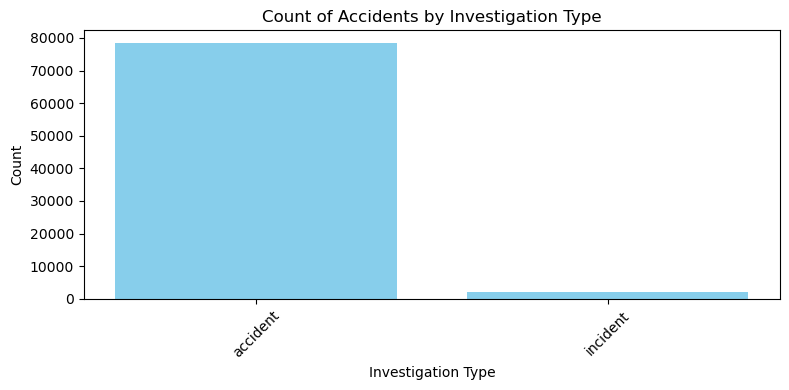

In [38]:
# Create a new figure with a specified size (width, height)
plt.figure(figsize=(8, 4))

# Create a bar plot to visualize the counts of accidents by investigation type
plt.bar(accident_counts['investigation_type'], accident_counts['count'], color='skyblue')

# Set the title of the plot to describe what is being visualized
plt.title('Count of Accidents by Investigation Type')

# Label the x-axis to indicate what the categories represent
plt.xlabel('Investigation Type')

# Label the y-axis to indicate what the counts represent
plt.ylabel('Count')

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap and ensure everything fits well in the figure and display the figure
plt.tight_layout();

##### Accidents Over Time
I examine trends in the number of accidents over the years using the year column 

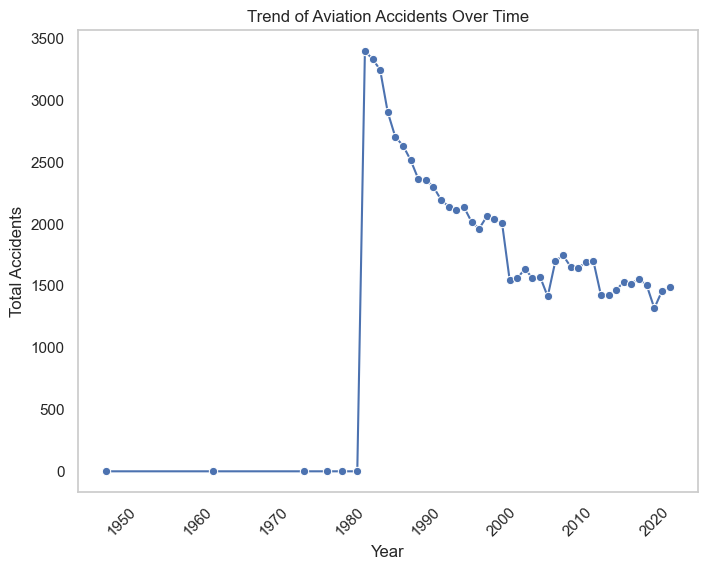

In [39]:
# Group by year and count the number of accidents
yearly_accident_counts = data1['year'].value_counts().reset_index()
yearly_accident_counts.columns = ['year','TotalAccidents']

# Sort by year
accident_counts = yearly_accident_counts.sort_values(by='year')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(8, 6))

# Create a line plot to visualize the trend of accidents over the years
sns.lineplot(data=accident_counts, x='year', y='TotalAccidents', marker='o')

# Set the title of the plot to describe what is being visualized
plt.title('Trend of Aviation Accidents Over Time')

# Label the x-axis to indicate what the values represent
plt.xlabel('Year')

# Label the y-axis to indicate what the values represent
plt.ylabel('Total Accidents')

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add a grid to the plot for easier visualization of trends and display
plt.grid();

#### Injury Analysis
##### Total Injuries by Aircraft Category
I calculate the total number of injuries (fatal, serious, minor) by aircraft_category to identify which types of aircraft are associated with higher injury rates.


In [40]:
# Calculate total injuries by aircraft category
injuries_by_category = data1.groupby('aircraft_category').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum',
    'total_injuries': 'sum'
}).reset_index()

# Display the results
injuries_by_category

,aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries
0,airplane,12182,6844,6132,25158
1,balloon,73,91,135,299
2,blimp,3,3,5,11
3,glider,217,178,169,564
4,gyrocraft,70,68,46,184
5,helicopter,1871,1009,912,3792
6,powered parachute,15,39,70,124
7,powered-lift,3,2,2,7
8,rocket,1,0,1,2
9,ultr,0,0,1,1


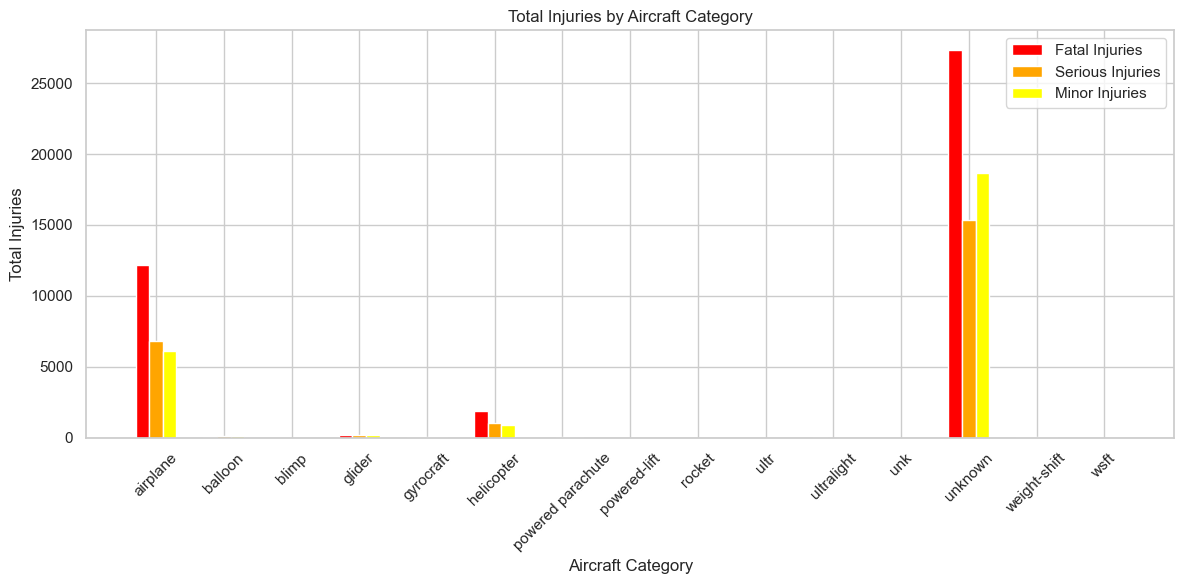

In [41]:
# Plotting total injuries by aircraft category
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = range(len(injuries_by_category))

# Create bars for each type of injury
plt.bar(index, injuries_by_category['total_fatal_injuries'], bar_width, label='Fatal Injuries', color='red')
plt.bar([i + bar_width for i in index], injuries_by_category['total_serious_injuries'], bar_width, label='Serious Injuries', color='orange')
plt.bar([i + 2 * bar_width for i in index], injuries_by_category['total_minor_injuries'], bar_width, label='Minor Injuries', color='yellow')

# Adding labels and title and displaying
plt.xlabel('Aircraft Category')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Aircraft Category')
plt.xticks([i + bar_width for i in index], injuries_by_category['aircraft_category'], rotation=45)
plt.legend()
plt.tight_layout();

Observations:
1. Highest Injury Category:
The "unknown" aircraft category shows the highest number of total injuries, including fatal (red), serious (orange), and minor (yellow) injuries. This might indicate incomplete or ambiguous classification data.

2. Airplane Dominance:

Airplanes have the second-highest total injuries, with a significant number of fatal injuries compared to serious and minor injuries. This suggests that airplane-related accidents are more severe.

3. Low Injury Counts for Other Aircraft:

Categories such as "balloon," "glider," "powered parachute," and others show relatively low numbers of injuries across all types. This may indicate either fewer accidents or lower exposure.

4. Helicopter Accidents:

Helicopters also show a moderate number of injuries, but with fewer fatal injuries compared to airplanes and the "unknown" category.

5. Data Imbalance:

The chart highlights that data for many aircraft types (like "rocket," "ultralight," etc.) is either minimal or underrepresented, focusing the majority of incidents on airplanes and unknown categories.
 
 Possible Insight:
The "unknown" classification might reflect a lack of detailed reporting or categorization errors, leading to a large proportion of injuries being recorded there.

##### Injury Severity Analysis
I analyze the distribution of injuries based on the injury_severity column. 
This helps me understand how many injuries fall into each severity category.

In [42]:
# Count the number of injuries by severity
severity_counts = data1['injury_severity'].value_counts().reset_index()
severity_counts.columns = ['injury_severity', 'count']

# Display the counts
severity_counts

,injury_severity,count
0,non-fatal,62062
1,fatal,16093
2,unknown,1084
3,incident,1041
4,minor,202
5,serious,144


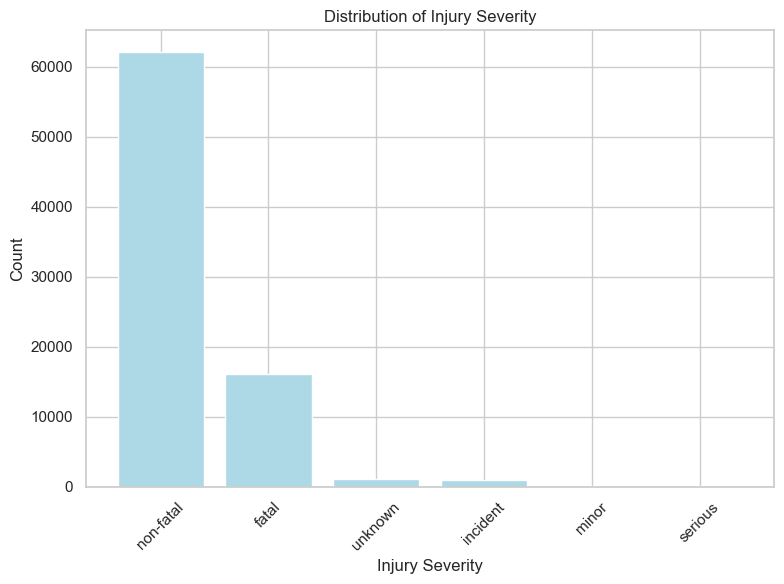

In [43]:
# Create a new figure with a specified size (width, height)
plt.figure(figsize=(8, 6))

# Create a bar plot to visualize the distribution of injury severity
plt.bar(severity_counts['injury_severity'], severity_counts['count'], color='lightblue')

# Set the title of the plot to describe what is being visualized
plt.title('Distribution of Injury Severity')

# Label the x-axis to indicate what the categories represent
plt.xlabel('Injury Severity')

# Label the y-axis to indicate what the counts represent
plt.ylabel('Count')

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap and ensure everything fits well in the figure and display it
plt.tight_layout();

#### Aircraft Analysis
##### Aircraft Damage Analysis
I investigate the relationship between aircraft_damage and aircraft_category to find aircraft and the damages they sustain. 

In [44]:
# Count the number of occurrences of each damage type by aircraft category
damage_by_category = data1.groupby(['aircraft_category', 'aircraft_damage']).size().unstack(fill_value=0)

# Display the results
damage_by_category

aircraft_damage,destroyed,minor,substantial,unknown
aircraft_category,,,,
airplane,3186,653,20605,859
balloon,12,32,50,72
blimp,1,0,3,0
glider,36,9,449,5
gyrocraft,25,1,144,0
helicopter,507,60,2539,78
powered parachute,4,10,73,3
powered-lift,1,1,1,1
rocket,1,0,0,0


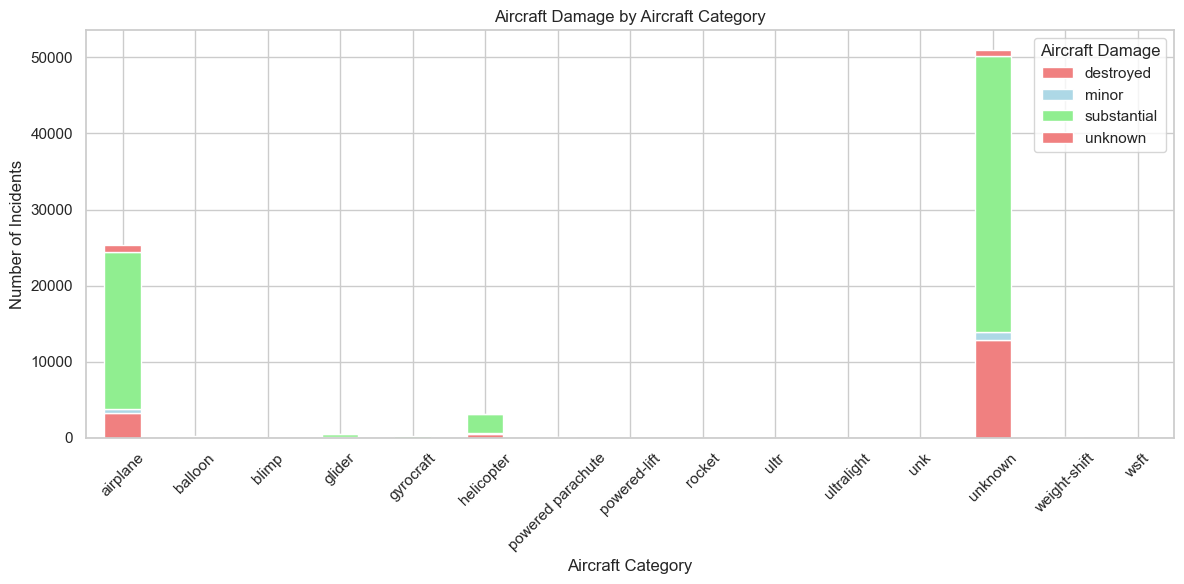

In [45]:
# Create a stacked bar plot to visualize the relationship between aircraft damage and aircraft category
damage_by_category.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightblue', 'lightgreen'])

# Set the title of the plot to describe what is being visualized
plt.title('Aircraft Damage by Aircraft Category')

# Label the x-axis to indicate what the categories represent
plt.xlabel('Aircraft Category')

# Label the y-axis to indicate what the values represent
plt.ylabel('Number of Incidents')

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add a legend to the plot to indicate what each color represents in terms of aircraft damage
plt.legend(title='Aircraft Damage')

# Adjust the layout to prevent overlap and ensure everything fits well in the figure and display it
plt.tight_layout();

observations:
unknown has the highest number of accidents with most damages followed by airplanes then helicopters and lastly gliders
the unknown should be filled with the proper values so as to get better understanding

##### Make and Model Analysis
I group the data by make and model and count the number of accidents for each combination. 
This helps me identify if certain manufacturers or models have higher accident rates.

In [46]:
# Count the number of accidents by make and model
accidents_by_make_model = data1.groupby(['make', 'model']).size().reset_index(name='accident_count')

# Sort the results by accident count
accidents_by_make_model = accidents_by_make_model.sort_values(by='accident_count', ascending=False)

# Display the top results
accidents_by_make_model.head(10)  # Display top 10 makes/models

,make,model,accident_count
3954,cessna,152,2325
3977,cessna,172,1693
4025,cessna,172n,1083
12168,piper,pa-28-140,875
3928,cessna,150,818
4023,cessna,172m,743
4028,cessna,172p,635
4082,cessna,182,634
4058,cessna,180,600
3953,cessna,150m,573


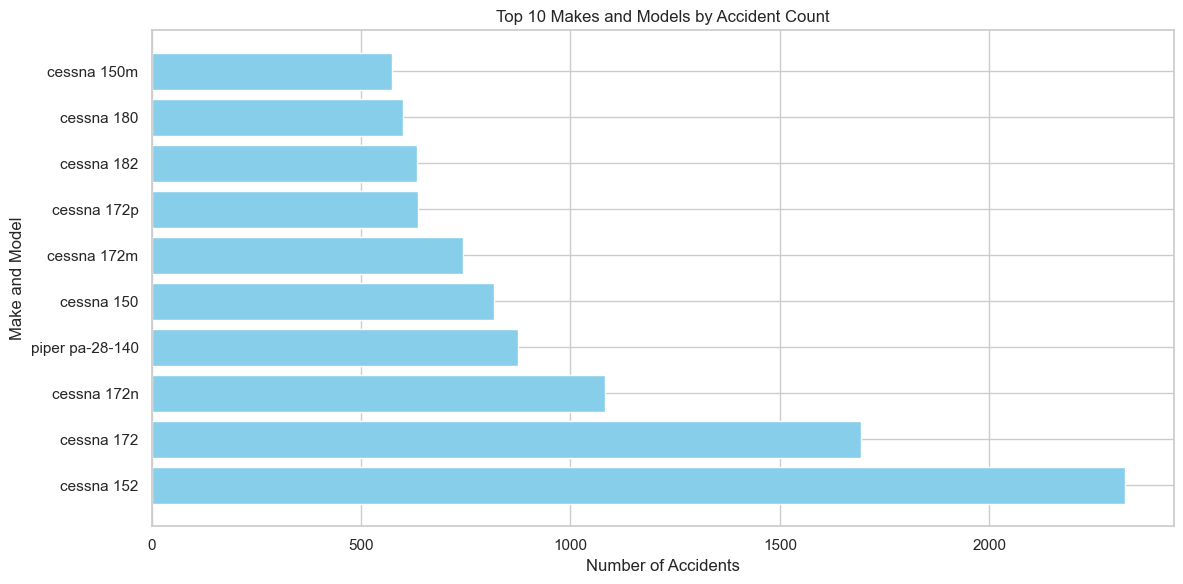

In [47]:

# Select the top 10 makes and models based on accident count
top_makes_models = accidents_by_make_model.head(10)

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot to visualize the top makes and models by accident count
# Concatenate 'make' and 'model' columns to create a single label for each bar
plt.barh(top_makes_models['make'] + ' ' + top_makes_models['model'], top_makes_models['accident_count'], color='skyblue')

# Set the title of the plot to describe what is being visualized
plt.title('Top 10 Makes and Models by Accident Count')

# Label the x-axis to indicate what the values represent
plt.xlabel('Number of Accidents')

# Label the y-axis to indicate what the categories represent
plt.ylabel('Make and Model')

# Adjust the layout to prevent overlap and ensure everything fits well in the figure and display it
plt.tight_layout();

observations:
* most appearing make is cesna.
* 150 has the least no of accidents

#### Correlation Analysis
I perform correlation analysis between different numerical columns (e.g., total injuries, total fatal injuries) to identify their relationships.
Use the .corr() method in Pandas to calculate the correlation matrix for the numerical columns. 
This will give you a matrix showing the correlation coefficients between each pair of numerical columns.

In [48]:
# Select relevant numerical columns for correlation analysis
numerical_columns = ['total_injuries', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']

# Calculate the correlation matrix
correlation_matrix = data1[numerical_columns].corr()

# Display the correlation matrix
correlation_matrix

,total_injuries,total_fatal_injuries,total_serious_injuries,total_minor_injuries
total_injuries,1.000000,0.791795,0.643978,0.632800
total_fatal_injuries,0.791795,1.000000,0.213274,0.173572
total_serious_injuries,0.643978,0.213274,1.000000,0.337641
total_minor_injuries,0.632800,0.173572,0.337641,1.000000


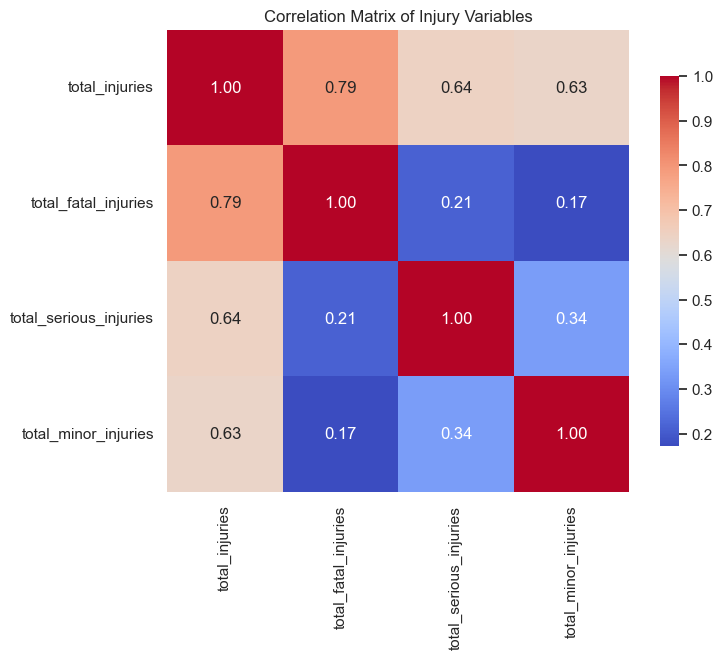

In [49]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels and display the heatmap
plt.title('Correlation Matrix of Injury Variables');

observations:
* there is high corelation betweem total_injuries,total_fatal_injuries,total_minor_injuries and total_serious_injuries
* This means that increase in one will increase the total_injuries 

#### comparative safety analysis 
I create a detailed comparison of accident rates among different aircraft manufacturers and models to identify which brands have better safety records.

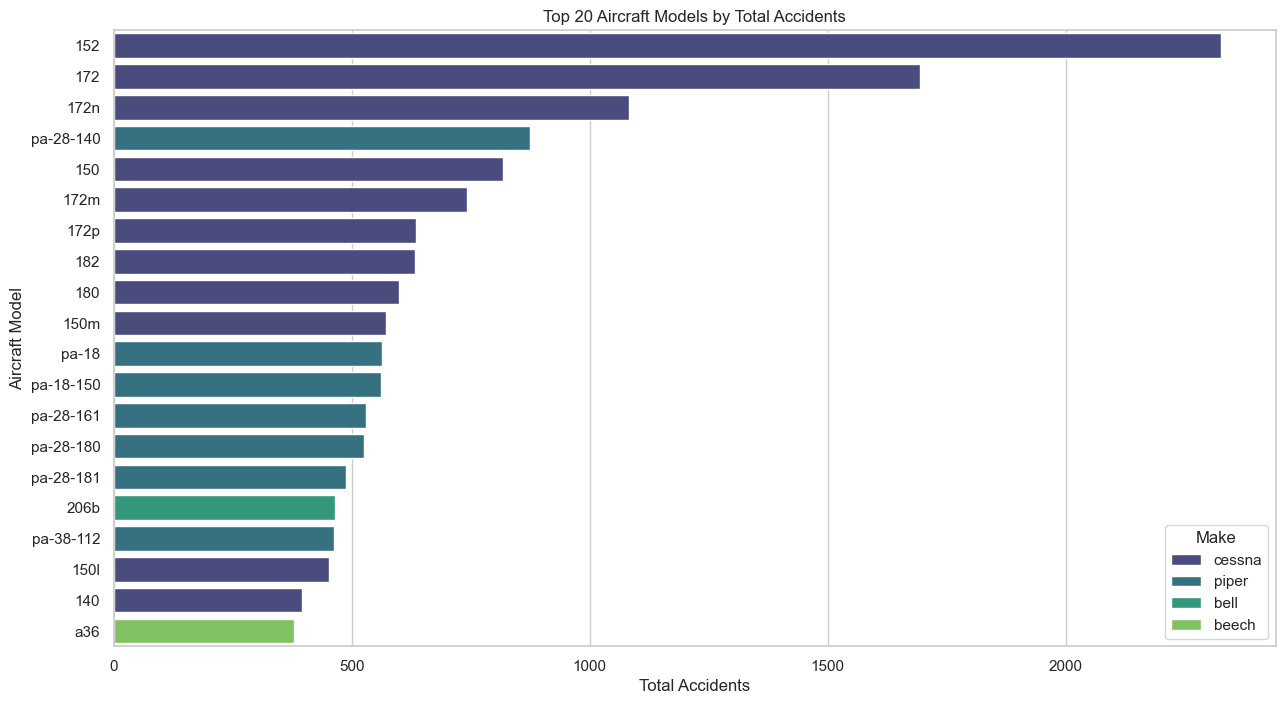

In [50]:
# Group by Manufacturer and Model to count accidents
accident_counts = data1.groupby(['make', 'model']).size().reset_index(name='total_accidents')
# Group by Manufacturer and Model to sum fatalities
fatality_counts = data1.groupby(['make', 'model'])['total_injuries'].sum().reset_index(name='total_sum_fatalities')

# Merge accident and fatality data
merged_data = pd.merge(accident_counts, fatality_counts, on=['make', 'model',])

# Calculate accident rate (accidents per model)
merged_data['accident_rate'] = merged_data['total_accidents'] / merged_data['total_accidents'].sum()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 8))

# Create a bar plot using Seaborn to visualize the total accidents by aircraft model
# The data is sorted by 'total_accidents' in descending order and the top 20 entries are selected
sns.barplot(data=merged_data.sort_values(by='total_accidents', ascending=False).head(20), 
            x='total_accidents', y='model', hue='make', palette='viridis')

# Set the title of the plot to describe what is being visualized
plt.title('Top 20 Aircraft Models by Total Accidents')

# Label the x-axis to indicate what the values represent
plt.xlabel('Total Accidents')

# Label the y-axis to indicate what the categories represent
plt.ylabel('Aircraft Model')

# Add a legend to the plot to indicate the different manufacturers (makes) and display
plt.legend(title='Make');



observation:
* the safest model because of less accidents is beech model a36 and cessna 140    

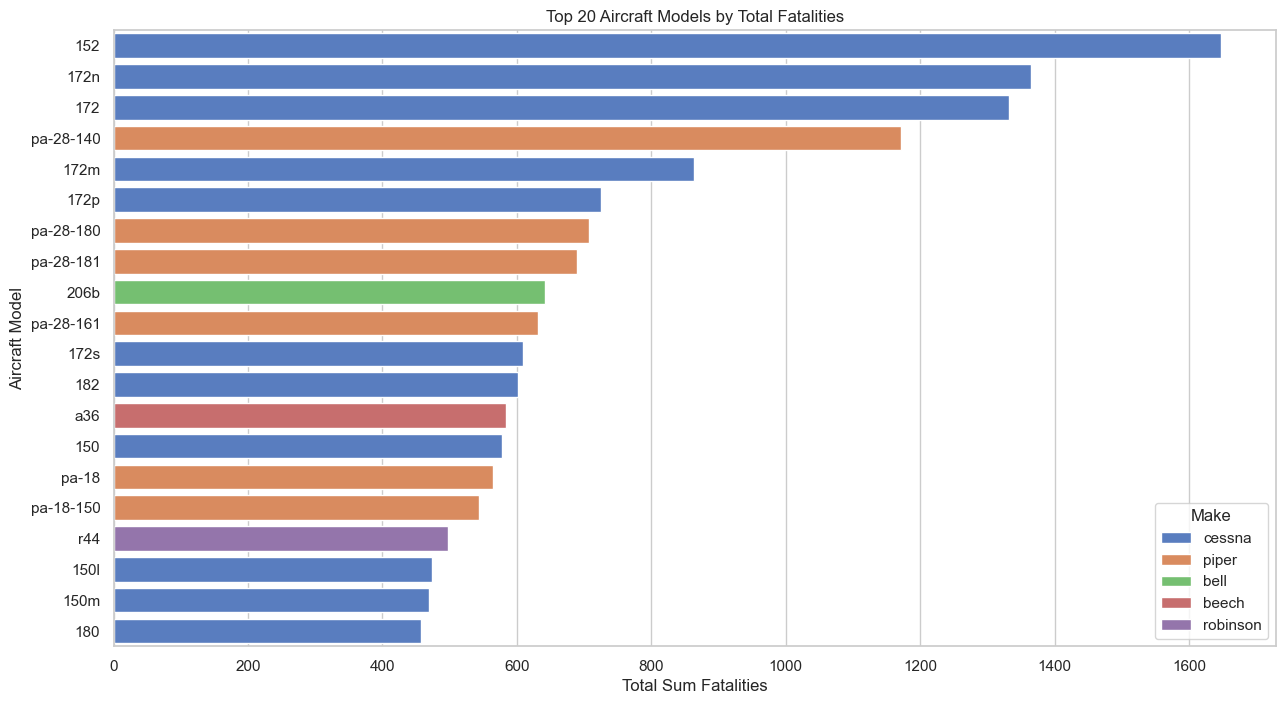

In [51]:
#create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 8))

# Create a bar plot using Seaborn to visualize the total fatalities by aircraft model
# The data is sorted by 'total_sum_fatalities' in descending order and the top 20 entries are selected
sns.barplot(data=merged_data.sort_values(by='total_sum_fatalities', ascending=False).head(20), 
            x='total_sum_fatalities', y='model', hue='make', palette='muted')

# Set the title of the plot to describe what is being visualized
plt.title('Top 20 Aircraft Models by Total Fatalities')

# Label the x-axis to indicate what the values represent
plt.xlabel('Total Sum Fatalities')

# Label the y-axis to indicate what the categories represent
plt.ylabel('Aircraft Model')

# Add a legend to the plot to indicate the different manufacturers (makes) an dispay
plt.legend(title='Make');

#### risk assessment analysis 
 I want to determine which aircrafts have the lowest risk  

C:\Users\lilwa\AppData\Local\Temp\ipykernel_2724\1563483593.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=safest_aircraft, x='total_accidents_per_craft', y='aircraft', palette='viridis')


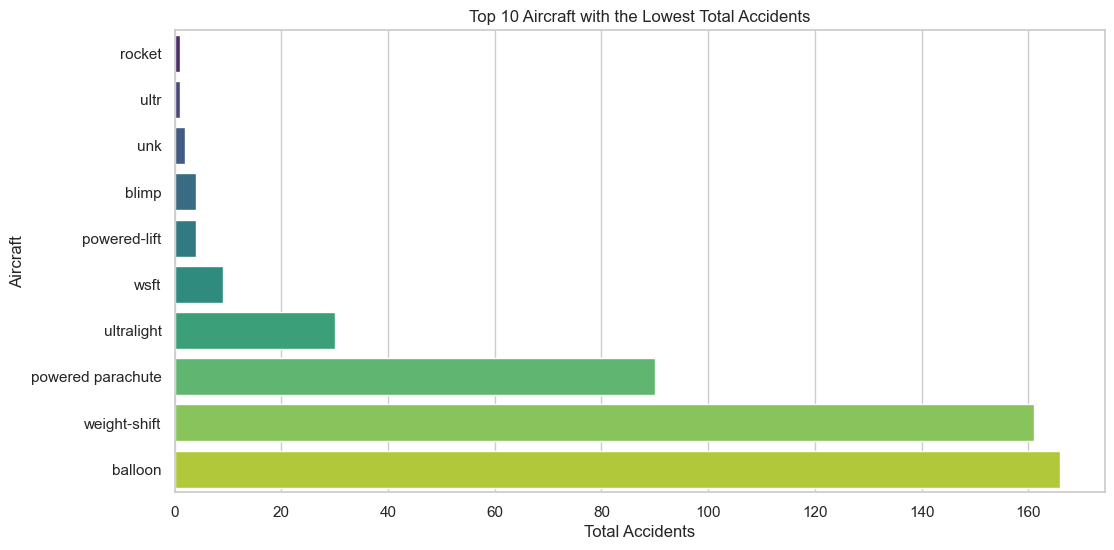

In [52]:
# Filter the DataFrame for rows where investigation_type indicates an accident
accident_data = data1[data1['investigation_type'] == 'Accident']

# Group by aircraft type and calculate total accidents per craft and total fatalities per craft
aircraft_stats = data1.groupby('aircraft_category').agg({'investigation_type': 'count', 'total_injuries': 'sum'}).reset_index()
aircraft_stats.columns = ['aircraft', 'total_accidents_per_craft', 'total_fatalities_per_craft']

# Sort by Total Accidents per craft to find the safest aircraft
safest_aircraft = aircraft_stats.sort_values(by='total_accidents_per_craft').head(10)

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar Plot for Total Accidents
plt.figure(figsize=(12, 6))
sns.barplot(data=safest_aircraft, x='total_accidents_per_craft', y='aircraft', palette='viridis')
plt.title('Top 10 Aircraft with the Lowest Total Accidents')
plt.xlabel('Total Accidents')
plt.ylabel('Aircraft')
plt.show()



C:\Users\lilwa\AppData\Local\Temp\ipykernel_2724\2525763170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=safest_aircraft, x='total_fatalities_per_craft', y='aircraft', palette='magma')


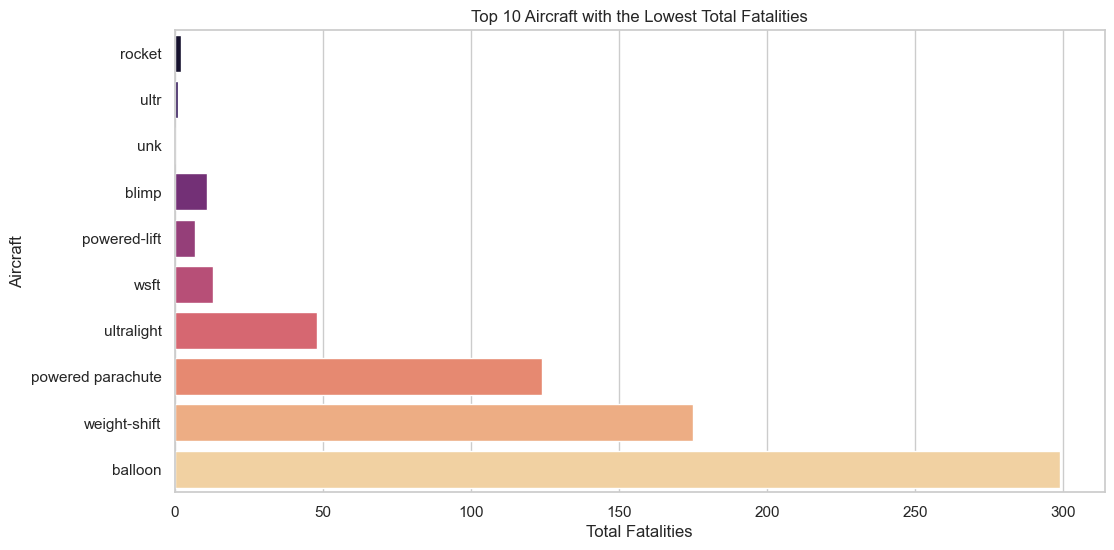

In [53]:
# Bar Plot for Total Fatalities
plt.figure(figsize=(12, 6))
sns.barplot(data=safest_aircraft, x='total_fatalities_per_craft', y='aircraft', palette='magma')
plt.title('Top 10 Aircraft with the Lowest Total Fatalities')
plt.xlabel('Total Fatalities')
plt.ylabel('Aircraft')
plt.show()



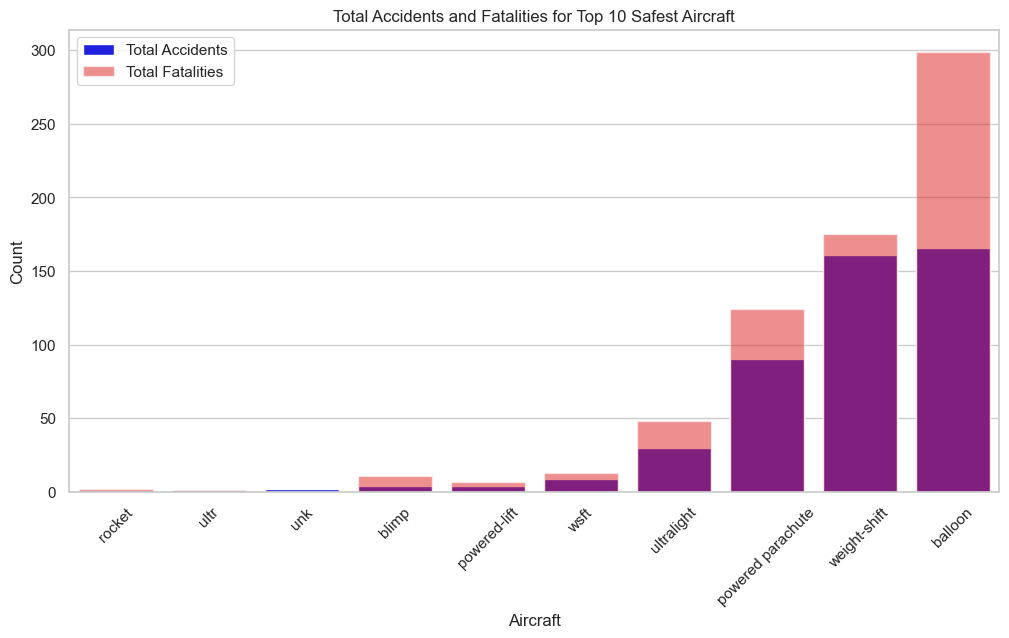

In [54]:
# Combined Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=safest_aircraft, x='aircraft', y='total_accidents_per_craft', color='blue', label='Total Accidents')
sns.barplot(data=safest_aircraft, x='aircraft', y='total_fatalities_per_craft', color='red', label='Total Fatalities', alpha=0.5)
plt.title('Total Accidents and Fatalities for Top 10 Safest Aircraft')
plt.xlabel('Aircraft')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Observations:
* The safest aircrafts are rockets,ultr,blimp,powered lifts and wsft
* unknown also has low fatalities and accidents but since its unknown its of no help to me

In [55]:
#save the new dataframe in csv format
data1.to_csv("AviationData_clean.csv", index=False)